In [266]:
def y_coord(x):
    # return 2*x+1
    return x

In [267]:
import numpy as np
x=np.array([[-3,-2,-1,0,1,2,3]])

In [268]:
y_act = np.array([y_coord(i) for i in x] )

In [270]:
y_act

array([[-3, -2, -1,  0,  1,  2,  3]])

In [18]:
import matplotlib.pyplot as plt

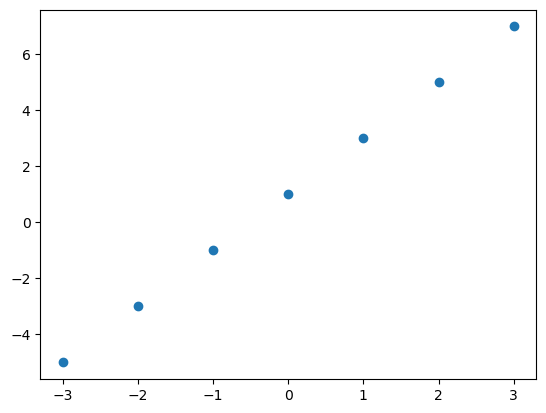

In [229]:
plt.scatter(x,y_act)


In [22]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [23]:
import numpy as np

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [282]:
import random 
import numpy as np
w1 = np.array([[random.random(),random.random(),random.random()]])
w2 = np.transpose(np.array([[random.random(),random.random(),random.random()]]))
b1 = np.array([[random.random(),random.random(),random.random()]])
b2 = np.array([[random.random()]])

In [27]:
w1.shape

(1, 3)

In [29]:
w2.shape

(3, 1)

In [30]:
b1.shape

(1, 3)

In [31]:
b2.shape

(1, 1)

In [96]:
def forward(x,w1,w2,b1,b2):
    y1 = np.apply_along_axis(sigmoid, axis=0, arr=np.dot(x,w1)+b1)
    y2 = np.dot(y1,w2.reshape(3, 1))+b2
    y3 = sigmoid(np.dot(y1,w2)+b2)
    return y3

In [93]:
w2.shape

(3, 1)

In [43]:
def fory1(x,w1,w2,b1,b2):
    y1 = np.apply_along_axis(sigmoid, axis=0, arr=np.dot(x,w1)+b1)
    return y1

In [142]:
 y1 = np.array([fory1(i,w1,w2,b1,b2) for i in x[0]])

In [145]:
y1[1].shape

(1, 3)

In [44]:
y3=forward(x[0][1],w1,w2,b1,b2)

In [140]:
y1=fory1(x[0][2],w1,w2,b1,b2)

In [47]:
def ssr(preds, acts):
    j1 = pow((preds - acts),2)
    j2 = np.sum(j1)
    return j2

In [75]:
learning_rate = 0.01

In [65]:
y_preds = np.array([forward(i,w1,w2,b1,b2) for i in x[0]])
y_preds = np.transpose(y_preds.reshape((7, 1)))

In [66]:
y_preds

array([[0.60874203, 0.6385032 , 0.67333181, 0.70810781, 0.73718642,
        0.75845965, 0.77298441]])

In [71]:
ssr(y_preds,y_act)

322.600830832283

In [67]:
y_preds.shape

(1, 7)

In [68]:
y_act.shape

(1, 7)

In [393]:
y_preds

array([[0.77451521, 0.88356512, 1.0074158 , 1.13621837, 1.25761628,
        1.36185384, 1.44507076]])

In [331]:
y_act

array([[ 4,  1,  0,  1,  4,  9, 16]])

In [218]:
def backward(x,y_act,y_preds,learning_rate,w1,w2):
    dssrbydpred = np.sum(-2*(y_act-y_preds))
    
    dssrbydb4 = dssrbydpred 
    
    dssrbydw4 = 0
    dssrbydw5 = 0
    dssrbydw6 = 0
    
    dssrbydw1=0
    dssrbydw2=0
    dssrbydw3=0
    
    dssrbydb1=0
    dssrbydb2=0
    dssrbydb3=0
    for i in range(len(y_act[0])):
        dssrbydw4 += -2*(y_act[0][i]-y_preds[0][i])*sigmoid(x[0][i]*w1[0][0]+b1[0][0])
        dssrbydw5 += -2*(y_act[0][i]-y_preds[0][i])*sigmoid(x[0][i]*w1[0][1]+b1[0][1])
        dssrbydw6 += -2*(y_act[0][i]-y_preds[0][i])*sigmoid(x[0][i]*w1[0][1]+b1[0][2])
        dssrbydw1 += -2*(y_act[0][i]-y_preds[0][i])*w2[0][0]*sigmoid_derivative(x[0][i]*w1[0][0]+b1[0][0])*x[0][i]
        dssrbydw2 += -2*(y_act[0][i]-y_preds[0][i])*w2[1][0]*sigmoid_derivative(x[0][i]*w1[0][1]+b1[0][1])*x[0][i]
        dssrbydw3 += -2*(y_act[0][i]-y_preds[0][i])*w2[2][0]*sigmoid_derivative(x[0][i]*w1[0][2]+b1[0][2])*x[0][i]

        dssrbydb1 += -2*(y_act[0][i]-y_preds[0][i])*w2[0][0]*sigmoid_derivative(x[0][i]*w1[0][0]+b1[0][0])
        dssrbydb2 += -2*(y_act[0][i]-y_preds[0][i])*w2[1][0]*sigmoid_derivative(x[0][i]*w1[0][1]+b1[0][1])
        dssrbydb3 += -2*(y_act[0][i]-y_preds[0][i])*w2[2][0]*sigmoid_derivative(x[0][i]*w1[0][2]+b1[0][2])
        
    new_w4 = w2[0] - dssrbydw4*learning_rate
    new_w5 = w2[1] - dssrbydw5*learning_rate
    new_w6 = w2[2] - dssrbydw6*learning_rate
    
    new_w1 = w1[0][0] - dssrbydw1*learning_rate
    new_w2 = w1[0][1] - dssrbydw2*learning_rate
    new_w3 = w1[0][2] - dssrbydw3*learning_rate

    new_b1 = b1[0][0] - dssrbydb1*learning_rate
    new_b2 = b1[0][1] - dssrbydb2*learning_rate
    new_b3 = b1[0][2] - dssrbydb3*learning_rate

    new_b4 = b2[0][0] - dssrbydb4*learning_rate

    changed_w1 = np.array([[new_w1,new_w2,new_w3]])
    changed_w2 = np.array([new_w4,new_w5,new_w6])
    changed_b1 = np.transpose(np.array([new_b1,new_b2,new_b3]))
    changed_b2 = np.array([[new_b4]])
    
    return changed_w1, changed_w2, changed_b1,changed_b2

In [212]:
a,b,c,d = backward(x,y_act,y_preds,learning_rate,w1,w2)

[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]
[0.61007841 0.68025219 0.7159074 ]


In [213]:
a.shape

(1, 3)

In [276]:
def display(w1,w2,b1,b2):
    print(w1)
    print()
    print(w2)
    print()
    print(b1)
    print()
    print(b2)
    print()

In [277]:
display(w1,w2,b1,b2)

[[1 0 0]]

[[1]
 [0]
 [0]]

[[0 0 0]]

[[0]]



In [278]:
def iterations(m,w1,w2,b1,b2):
    for i in range(m):
        # print("Iteration ",i+1,w2)
        y_preds = np.array([forward(i,w1,w2,b1,b2) for i in x[0]])
        y_preds = np.transpose(y_preds.reshape((7, 1)))
        if i%1000==0:
            print("Error at step ",i," is ",ssr(y_preds,y_act))
        w1,w2,b1,b2=backward(x,y_act,y_preds,0.001,w1,w2)
        
    print(y_preds)

In [279]:
iterations(100000,w1,w2,b1,b2)

Error at step  0  is  28.543695452409285
Error at step  1000  is  19.006714157285536
Error at step  2000  is  19.000017603220883
Error at step  3000  is  19.000000045130676
Error at step  4000  is  19.000000000114166
Error at step  5000  is  19.000000000000288
Error at step  6000  is  19.0
Error at step  7000  is  19.0
Error at step  8000  is  19.0
Error at step  9000  is  19.0
Error at step  10000  is  19.0
Error at step  11000  is  19.0
Error at step  12000  is  19.0
Error at step  13000  is  19.0
Error at step  14000  is  19.0
Error at step  15000  is  19.0
Error at step  16000  is  19.0
Error at step  17000  is  19.0
Error at step  18000  is  19.0
Error at step  19000  is  19.0
Error at step  20000  is  19.0
Error at step  21000  is  19.0
Error at step  22000  is  19.0
Error at step  23000  is  19.0
Error at step  24000  is  19.0
Error at step  25000  is  19.0
Error at step  26000  is  19.0
Error at step  27000  is  19.0
Error at step  28000  is  19.0
Error at step  29000  is  19.0

/var/folders/hp/36jbk5kd4k14sqknq07wz0kr0000gn/T/ipykernel_19230/2743225879.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Error at step  30000  is  19.0
Error at step  31000  is  19.0
Error at step  32000  is  19.0
Error at step  33000  is  19.0
Error at step  34000  is  19.0
Error at step  35000  is  19.0
Error at step  36000  is  19.0
Error at step  37000  is  19.0
Error at step  38000  is  19.0
Error at step  39000  is  19.0
Error at step  40000  is  19.0
Error at step  41000  is  19.0
Error at step  42000  is  19.0
Error at step  43000  is  19.0
Error at step  44000  is  19.0
Error at step  45000  is  19.0
Error at step  46000  is  19.0
Error at step  47000  is  19.0
Error at step  48000  is  19.0
Error at step  49000  is  19.0
Error at step  50000  is  19.0
Error at step  51000  is  19.0
Error at step  52000  is  19.0
Error at step  53000  is  19.0
Error at step  54000  is  19.0
Error at step  55000  is  19.0
Error at step  56000  is  19.0
Error at step  57000  is  19.0
Error at step  58000  is  19.0
Error at step  59000  is  19.0
Error at step  60000  is  19.0
Error at step  61000  is  19.0
Error at

In [280]:
y_preds = np.array([forward(i,w1,w2,b1,b2) for i in x[0]])
y_preds = np.transpose(y_preds.reshape((7, 1)))

In [281]:
y_preds

array([[0.51185425, 0.52976549, 0.56683301, 0.62245933, 0.67503753,
        0.70698737, 0.72163256]])

In [256]:
y_act 

array([[-5, -3, -1,  1,  3,  5,  7]])